In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Polynomial Kernels

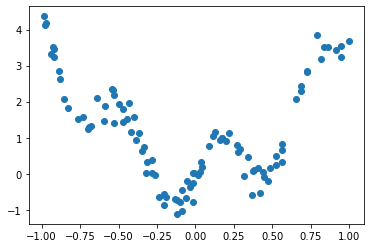

In [72]:
m = 100
x = -1 + 2*np.random.rand(m)
y = np.sin(10*x) + (2*x)**2 + 0.25*np.random.randn(m)
x=x
plt.scatter(x,y)

In [73]:
# cast x as a column vector
x = x.reshape(-1,1)

In [76]:
# apply polynomial kernel to the matrix with dot products
d = 10
K = (1+x.dot(x.T))**d
# solve least squares problem
alpha = np.linalg.lstsq(K,y,rcond=None)[0]

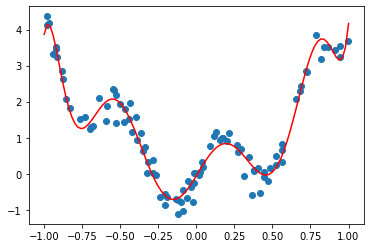

In [77]:
# plot results
m_plot = 100
x_plot = np.linspace(-1,1,m_plot).reshape(-1,1)
K_plot = (1+x_plot.dot(x.T))**d
y_plot = K_plot.dot(alpha)

plt.scatter(x,y)
plt.plot(x_plot,y_plot,'r')

## Gaussian Kernel

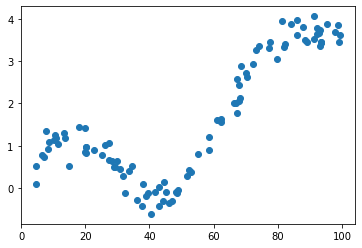

In [199]:
m = 100
x = 100*np.random.rand(m)
y = np.sin(x/10) + (x/50)**2 + 0.25*np.random.randn(m)
x=x
plt.scatter(x,y)

In [200]:
from sklearn.metrics import pairwise_distances
d = pairwise_distances(x.reshape(m,1))

In [235]:
sigma = 100
K = np.exp(-d**2/(2*sigma**2))
alpha = np.linalg.lstsq(K,y,rcond=None)[0]

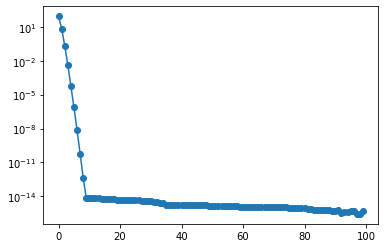

In [236]:
plt.semilogy(np.abs(np.linalg.eig(K)[0]),'o-')

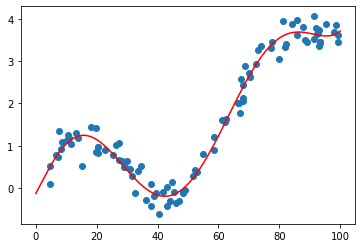

In [237]:
m_plot = 200
x_plot = np.linspace(0,100,m_plot)
d_plot = pairwise_distances(x_plot.reshape(m_plot,1),x.reshape(m,1))
K_plot = np.exp(-d_plot**2/(2*sigma**2))
y_plot = K_plot.dot(alpha)

plt.scatter(x,y)
plt.plot(x_plot,y_plot,'r')
#plt.ylim([-1,5])